In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import math
import copy

from settings import *
from utilities import *
from estimator import EKF

In [2]:
def simulate():
    time = 0.
    from estimator import EKF
    ekf = EKF()
    XEst = np.zeros((ROBOT_STATE_DIMS, 1))
    PEst = np.eye(ROBOT_STATE_DIMS)
    
    # Dead reckoning
    xDR = np.zeros((ROBOT_STATE_DIMS, 1))
    
    # We will also track the true position of the robot for this simulation.
    # Note that this is not possible in the real world.
    xTrue = np.zeros((ROBOT_STATE_DIMS, 1))
    
    # Track history, will be useful for debugging and plotting
    hXEst = copy.deepcopy(XEst)
    hxDR = copy.deepcopy(xDR)
    hxTrue = copy.deepcopy(xTrue)
    
    while(time < TOTAL_SIM_TIME):
        time = time + DT
        
        # This step also abstracts away that the robot has physically moved with control command u.
        # This u is the uncorrupted reading from the proprioceptive sensors. We will simulate its
        # corruption in the *observation* function. In the real-world, it will always be corrupted.
        u = calc_input()
        
        # In the real-robot case, the observation function will only return Z and xDR.
        xTrue, z_noisy, xDR, u_noisy = observation(xTrue, xDR, u)
        XEst, PEst = ekf.ekf_slam(XEst, PEst, u_noisy, z_noisy)
        
        # store data history
        hXEst = np.vstack((hXEst, np.zeros((XEst.shape[0]-hXEst.shape[0], hXEst.shape[1]))))
        hXEst = np.hstack((hXEst, XEst))
        hxDR = np.hstack((hxDR, xDR))
        hxTrue = np.hstack((hxTrue, xTrue))
        
    # Plotting
    plt.plot(RFID[:, 0], RFID[:, 1], "*k", label='true landmark pose')

    # plot landmark
    for i in range(1, calc_n_LM(XEst)):
        plt.plot(XEst[ROBOT_STATE_DIMS + i * LM_STATE_DIMS],
                 XEst[ROBOT_STATE_DIMS + i * LM_STATE_DIMS + 1], "xg")
    plt.plot(XEst[ROBOT_STATE_DIMS],
                 XEst[ROBOT_STATE_DIMS + 1], "xg", label='estimate landmark pose')
    
    # plot trajectories
    plt.plot(hxTrue[0, :],
             hxTrue[1, :], "-b", label='true robot pose')
    plt.plot(hxDR[0, :],
             hxDR[1, :], "-k", label='dead reckoning')
    plt.plot(hXEst[0, :],
             hXEst[1, :], "-r", label='estimated robot pose')

    plt.axis("equal")
    plt.grid(True)
    plt.legend()

<IPython.core.display.Javascript object>


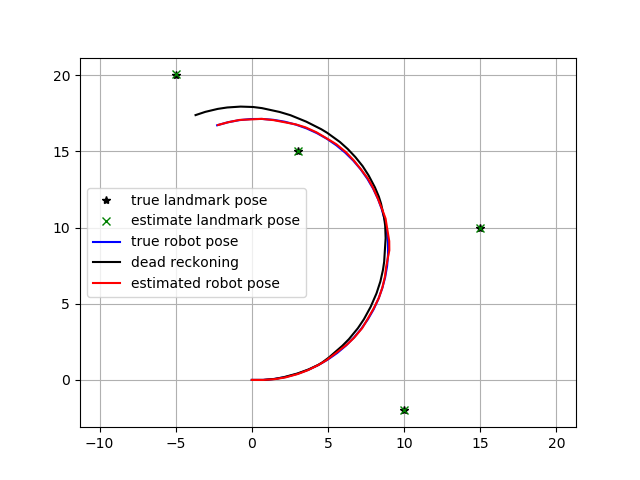

In [3]:
simulate()